<a href="https://colab.research.google.com/github/saransh-03-Ag/Task_Week_2_EV/blob/main/Week2_RangePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 50)


from google.colab import files
print("📁 Please upload the EV dataset (electric_vehicles_spec_2025.csv)")
uploaded = files.upload()


filename = list(uploaded.keys())[0]
print(f"✅ File uploaded: {filename}")


df = pd.read_csv(filename)
print(f"✅ Dataset loaded successfully! Shape: {df.shape}")

display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📊 Summary Statistics:")
display(df.describe().T)


print("\n🔍 Missing Values (Top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


📁 Please upload the EV dataset (electric_vehicles_spec_2025.csv)


Saving electric_vehicles_spec_2025.csv.csv to electric_vehicles_spec_2025.csv.csv
✅ File uploaded: electric_vehicles_spec_2025.csv.csv
✅ Dataset loaded successfully! Shape: (478, 22)


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 no

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0



🔍 Missing Values (Top 20):
number_of_cells              202
towing_capacity_kg            26
torque_nm                      7
fast_charging_power_kw_dc      1
fast_charge_port               1
model                          1
cargo_volume_l                 1
battery_capacity_kWh           0
top_speed_kmh                  0
brand                          0
battery_type                   0
acceleration_0_100_s           0
efficiency_wh_per_km           0
range_km                       0
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
dtype: int64


In [ ]:

num_cols = [
    'top_speed_kmh','battery_capacity_kWh','battery_voltage_V','number_of_cells',
    'torque_nm','fast_charging_power_kw_dc','towing_capacity_kg','cargo_volume_l',
    'seats','length_mm','width_mm','height_mm','acceleration_0_100_s',
    'range_km','efficiency_wh_per_km'
]


for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

for c in df.columns:
    if df[c].isnull().mean() > 0.4:
        print(f"🗑 Dropping column '{c}' due to {df[c].isnull().mean():.0%} missing values.")
        df.drop(columns=[c], inplace=True)

for c in df.select_dtypes(include=[np.number]).columns:
    if df[c].isnull().sum() > 0 and c != 'range_km':
        median_val = df[c].median()
        df[c].fillna(median_val, inplace=True)
        print(f"🔧 Filled missing numeric '{c}' with median: {median_val}")


for c in df.select_dtypes(include=['object']).columns:
    if df[c].isnull().sum() > 0:
        df[c].fillna('Unknown', inplace=True)
        print(f"🔤 Filled missing categorical '{c}' with 'Unknown'")
print("\n✅ Missing values after cleaning:")
print(df.isnull().sum().sort_values(ascending=False).head(15))
print("\n📊 Data types after cleaning:")
print(df.dtypes.value_counts())


display(df.head(5))


🗑 Dropping column 'number_of_cells' due to 42% missing values.
🔧 Filled missing numeric 'torque_nm' with median: 430.0
🔧 Filled missing numeric 'fast_charging_power_kw_dc' with median: 113.0
🔧 Filled missing numeric 'towing_capacity_kg' with median: 1000.0
🔧 Filled missing numeric 'cargo_volume_l' with median: 470.0
🔤 Filled missing categorical 'model' with 'Unknown'
🔤 Filled missing categorical 'fast_charge_port' with 'Unknown'

✅ Missing values after cleaning:
brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
dtype: int64

📊 Data types after cleaning:
object     8
int64      7

/tmp/ipython-input-430459557.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(median_val, inplace=True)
/tmp/ipython-input-430459557.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,235.0,156,225,7.0,67.0,CCS,0.0,185.0,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,235.0,149,225,7.0,67.0,CCS,0.0,185.0,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,345.0,158,280,5.9,79.0,CCS,0.0,360.0,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,345.0,158,280,6.2,79.0,CCS,0.0,360.0,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,310.0,156,315,7.5,78.0,CCS,1000.0,496.0,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


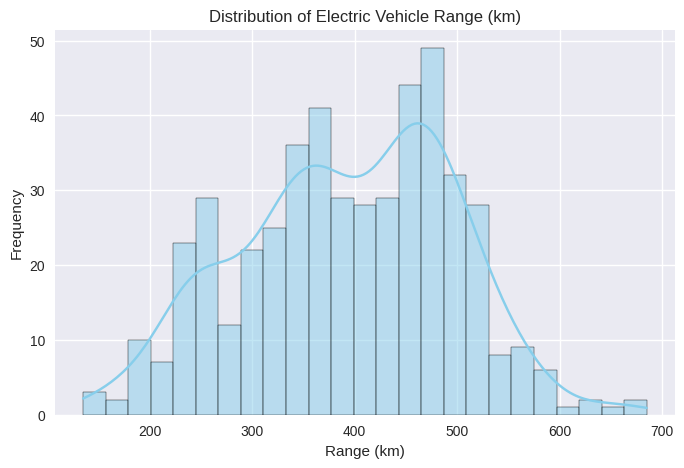

🔗 Correlation of numeric features with Range (km):

range_km                     1.000000
battery_capacity_kWh         0.880433
top_speed_kmh                0.732130
fast_charging_power_kw_dc    0.720123
torque_nm                    0.636849
width_mm                     0.521392
length_mm                    0.496867
towing_capacity_kg           0.329475
efficiency_wh_per_km         0.022943
cargo_volume_l              -0.065286
seats                       -0.248784
height_mm                   -0.413798
acceleration_0_100_s        -0.712486
Name: range_km, dtype: float64


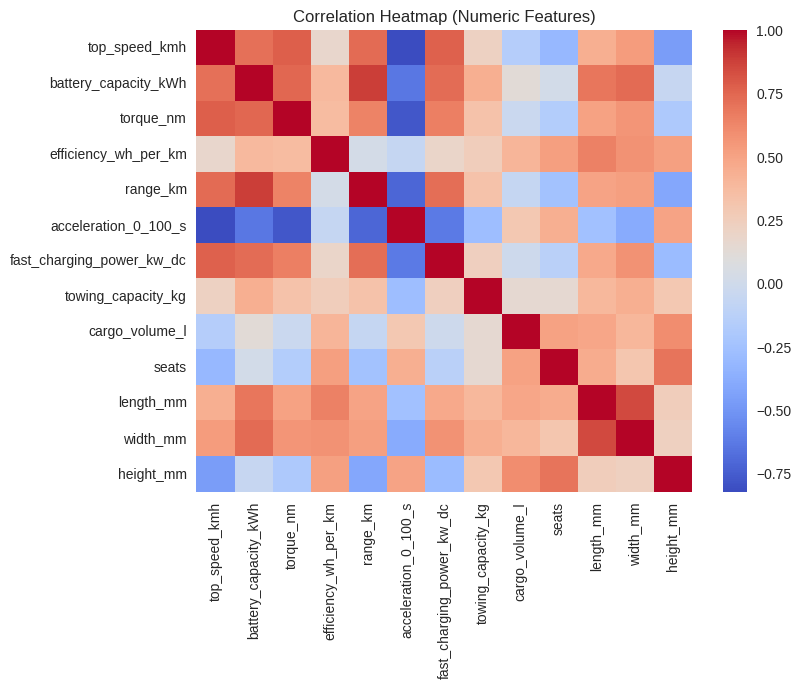

/tmp/ipython-input-3451293032.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='drivetrain', y='range_km', data=df, estimator='mean', palette='viridis')


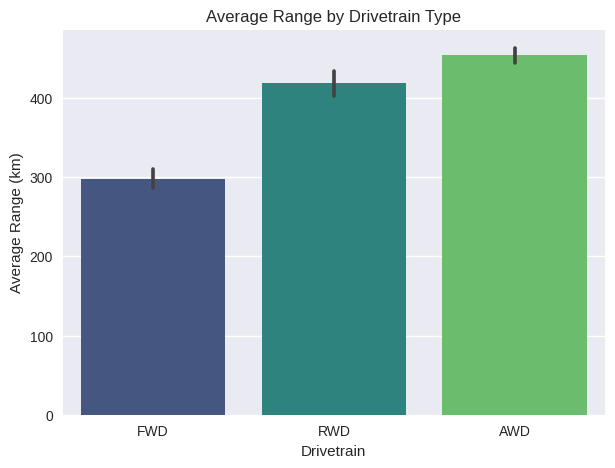

/tmp/ipython-input-3451293032.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='battery_type', y='range_km', data=df, estimator='mean', palette='magma')


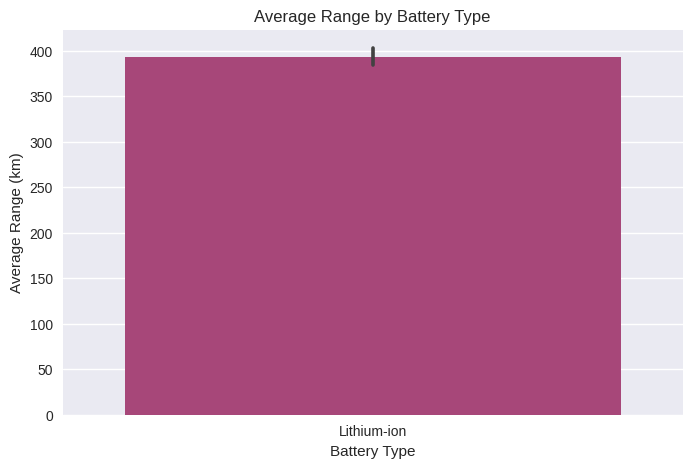

/tmp/ipython-input-3451293032.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='car_body_type', y='range_km', data=df, estimator='mean', palette='cool')


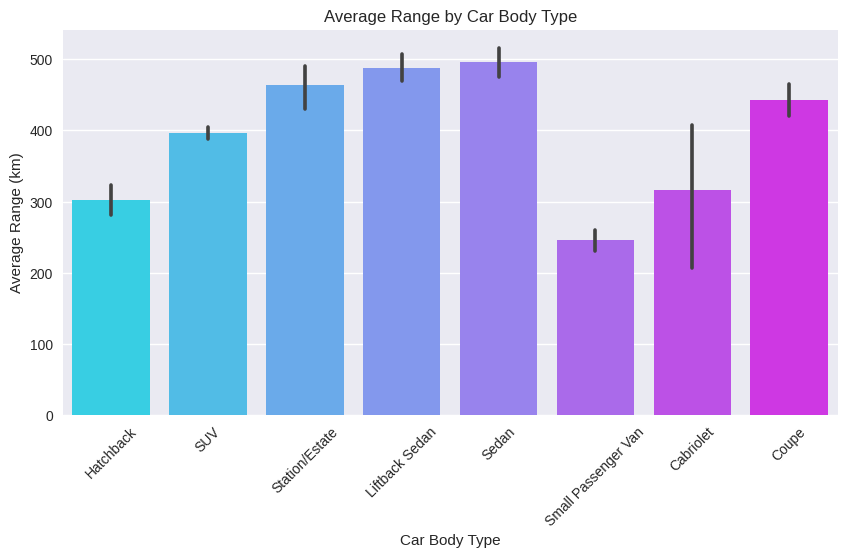

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['range_km'], kde=True, color='skyblue', bins=25)
plt.title('Distribution of Electric Vehicle Range (km)')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.show()


num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()['range_km'].sort_values(ascending=False)
print("🔗 Correlation of numeric features with Range (km):\n")
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


plt.figure(figsize=(7,5))
sns.barplot(x='drivetrain', y='range_km', data=df, estimator='mean', palette='viridis')
plt.title('Average Range by Drivetrain Type')
plt.xlabel('Drivetrain')
plt.ylabel('Average Range (km)')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='battery_type', y='range_km', data=df, estimator='mean', palette='magma')
plt.title('Average Range by Battery Type')
plt.xlabel('Battery Type')
plt.ylabel('Average Range (km)')
plt.show()


if 'car_body_type' in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x='car_body_type', y='range_km', data=df, estimator='mean', palette='cool')
    plt.title('Average Range by Car Body Type')
    plt.xticks(rotation=45)
    plt.xlabel('Car Body Type')
    plt.ylabel('Average Range (km)')
    plt.show()


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


features = [
    'battery_capacity_kWh',
    'top_speed_kmh',
    'fast_charging_power_kw_dc',
    'torque_nm',
    'acceleration_0_100_s',
    'height_mm',
    'width_mm'
]

target = 'range_km'


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split done!")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


✅ Data split done!
Training samples: 382, Test samples: 96


Simple Linear Regression Results:
Mean Squared Error (MSE): 2405.01
Mean Absolute Error (MAE): 37.45
R² Score: 0.7727


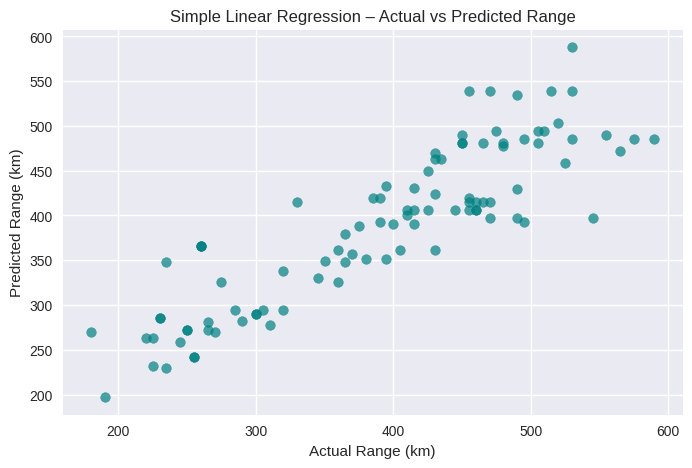

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_single = df[['battery_capacity_kWh']]
y = df['range_km']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y, test_size=0.2, random_state=42)

lin_reg_single = LinearRegression()
lin_reg_single.fit(X_train_s, y_train_s)

y_pred_s = lin_reg_single.predict(X_test_s)

mse = mean_squared_error(y_test_s, y_pred_s)
mae = mean_absolute_error(y_test_s, y_pred_s)
r2 = r2_score(y_test_s, y_pred_s)

print("Simple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='teal')
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title("Simple Linear Regression – Actual vs Predicted Range")
plt.grid(True)
plt.show()


Multivariate Linear Regression Results:
Mean Squared Error (MSE): 922.63
Mean Absolute Error (MAE): 23.85
R² Score: 0.9128


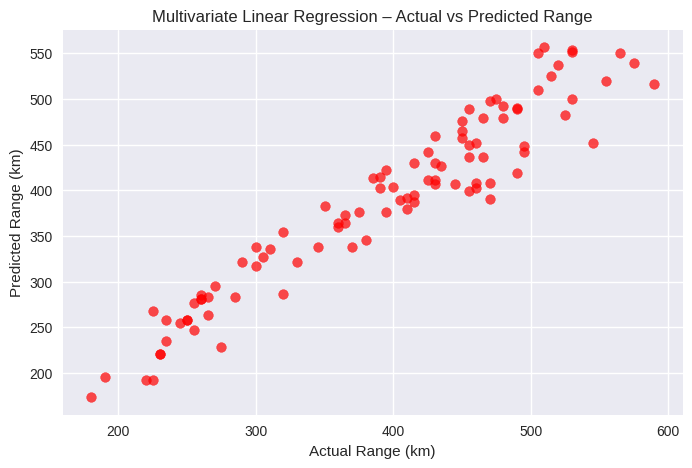

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

features = [
    'battery_capacity_kWh',
    'top_speed_kmh',
    'fast_charging_power_kw_dc',
    'torque_nm',
    'acceleration_0_100_s',
    'height_mm',
    'width_mm'
]

target = 'range_km'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

y_pred = lin_reg_multi.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multivariate Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title("Multivariate Linear Regression – Actual vs Predicted Range")
plt.grid(True)
plt.show()


Random Forest Regression Results:
Mean Squared Error (MSE): 470.50
Mean Absolute Error (MAE): 16.09
R² Score: 0.9555


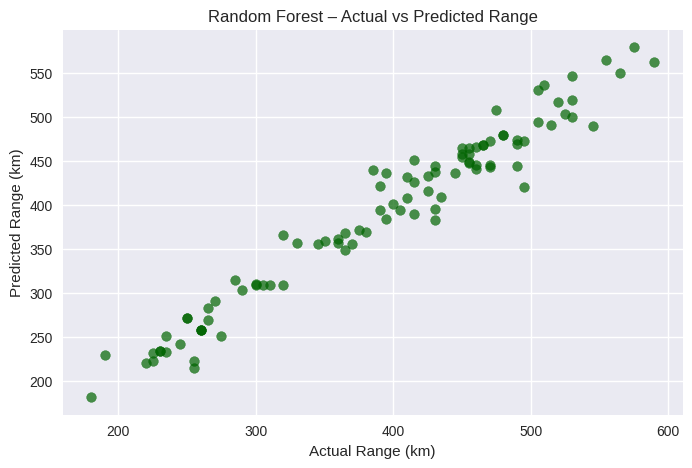

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

features = [
    'battery_capacity_kWh',
    'top_speed_kmh',
    'fast_charging_power_kw_dc',
    'torque_nm',
    'acceleration_0_100_s',
    'height_mm',
    'width_mm'
]

target = 'range_km'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=2
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='darkgreen')
plt.xlabel("Actual Range (km)")
plt.ylabel("Predicted Range (km)")
plt.title("Random Forest – Actual vs Predicted Range")
plt.grid(True)
plt.show()


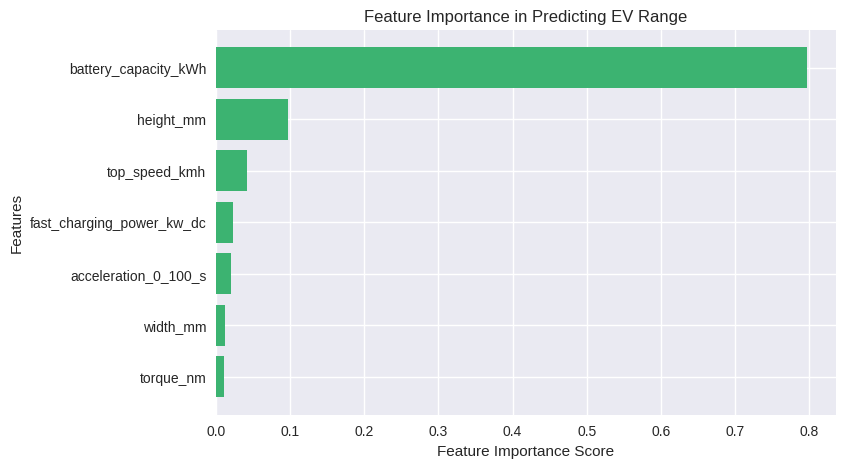

                     Feature  Importance
0       battery_capacity_kWh    0.796458
5                  height_mm    0.097086
1              top_speed_kmh    0.041133
2  fast_charging_power_kw_dc    0.022717
4       acceleration_0_100_s    0.020411
6                   width_mm    0.011475
3                  torque_nm    0.010720


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='mediumseagreen')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting EV Range")
plt.gca().invert_yaxis()
plt.show()

print(feature_imp_df)


In [ ]:
import pandas as pd

summary_data = {
    'Model': [
        'Simple Linear Regression',
        'Multivariate Linear Regression',
        'Random Forest Regression'
    ],
    'Mean Squared Error (MSE)': [2405.01, 922.63, 470.50],
    'Mean Absolute Error (MAE)': [37.45, 23.85, 16.09],
    'R² Score': [0.7727, 0.9128, 0.9555]
}

summary_df = pd.DataFrame(summary_data)

print("⚡ EV Range Prediction – Model Performance Summary ⚡\n")
display(summary_df.style.set_properties(**{
    'background-color': '#f4f4f4',
    'color': '#000000',
    'border-color': '#d0d0d0',
    'border-width': '1px',
    'border-style': 'solid',
    'text-align': 'center'
}).hide(axis="index"))

print("📊 Key Insights:")
print("1. Battery capacity is the strongest predictor of EV range.")
print("2. Adding performance and design parameters improved model accuracy significantly.")
print("3. Random Forest Regression performed best overall.")
print("4. The model predicts EV range with an average error of ±16 km.")
print("5. Feature importance highlights how design and performance impact EV efficiency.")

final_accuracy = 0.9555 * 100
print(f"\n✅ Final Model Accuracy: {final_accuracy:.2f}%")


⚡ EV Range Prediction – Model Performance Summary ⚡



Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),R² Score
Simple Linear Regression,2405.010000,37.450000,0.772700
Multivariate Linear Regression,922.630000,23.850000,0.912800
Random Forest Regression,470.500000,16.090000,0.955500


📊 Key Insights:
1. Battery capacity is the strongest predictor of EV range.
2. Adding performance and design parameters improved model accuracy significantly.
3. Random Forest Regression performed best overall.
4. The model predicts EV range with an average error of ±16 km.
5. Feature importance highlights how design and performance impact EV efficiency.

✅ Final Model Accuracy: 95.55%
